In [1]:
from dnn_np import *
from activation_np import *
from util import *
from gradient_check import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
train_x, train_y, test_x, test_y = get_bat_data()

Reading bat data...
EOF Reached
Done reading


### Load dữ liệu và tạo 1 đối tượng net để tính toán thuật toán lan truyền 

In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
num_class = (np.unique(train_y)).shape[0]
train_x = add_one(train_x)
train_y = train_y.flatten()
net = NeuralNet(num_class, 0.00015)
net.add_linear_layer((train_x.shape[1], 60), 'relu')
net.add_linear_layer((60, 100), 'relu')
net.add_linear_layer((100, 100), 'relu')
net.add_linear_layer((100, num_class), 'softmax')


(12000, 2) (12000,) (3000, 2) (3000,)


## **Kiểm tra từng hàm dựa trên bộ dữ liệu train (Chưa train model)** 

### Đối với thuật toán lan truyền thuận


In [4]:
print(num_class)
print(test_y)
print("Shape is: ",train_y.shape)
print("========================================================================")
train_y = create_one_hot(train_y, net.num_class)
# test_x = add_one(test_x)
print("One hot matrix of y after converted is: \n", test_y)
print("Shape of matrix y after coverted: ", test_y.shape)
# layer = net.layers[0]
# print(np.sum(layer.w))
# print(type(np.sum(layer.w)))

print("========================================================================")
y_hat = net.forward(train_x)[-1]
print("y predicted: \n", y_hat)
print("Shape of matrix y hat after predicted is: ", y_hat.shape)
print("========================================================================")
data_loss = -np.mean(np.sum(train_y*np.log(y_hat), axis = 1))
print("Data loss is: ", data_loss)
# loss = net.compute_loss(test_y, y_hat)
print("========================================================================")
reg_loss = 0.5*net.reg*(sum([np.sum(layer.w**2) for layer in net.layers]))
print("Regularization loss: ", reg_loss)
print("========================================================================")
print("Sum of data loss and regularization loss: ", data_loss + reg_loss)
print("========================================================================")
y_predict = np.argmax(y_hat, axis = 1, keepdims = True)
ylabel = np.argmax(train_y, axis = 1, keepdims = True)
acc = np.mean(y_predict == ylabel)
print("Accuracy : ", acc*100)
# print(loss)
# test(y_hat, test_y)

3
[1 2 0 ... 0 1 0]
Shape is:  (12000,)
One hot matrix of y after converted is: 
 [1 2 0 ... 0 1 0]
Shape of matrix y after coverted:  (3000,)
y predicted: 
 [[0.42325213 0.08421257 0.4925353 ]
 [0.66328812 0.12614298 0.2105689 ]
 [0.55856388 0.13731214 0.30412399]
 ...
 [0.53939002 0.15560698 0.305003  ]
 [0.40951253 0.02997701 0.56051046]
 [0.42394389 0.09997083 0.47608528]]
Shape of matrix y hat after predicted is:  (12000, 3)
Data loss is:  1.3653385272817853
Regularization loss:  0.014285499157464505
Sum of data loss and regularization loss:  1.3796240264392499
Accuracy :  36.608333333333334


### Đối với thuật toán lan truyền ngược

*   Tạo 1 object khác để thực hiện thuật toán lan truyền ngược dựa trên bộ dữ liệu bat



In [5]:
train_x, train_y, test_x, test_y = get_bat_data()
train_x, _, test_x = normalize(train_x, train_x, test_x)
test_y = test_y.flatten()
train_y = train_y.flatten()
num_class = (np.unique(train_y)).shape[0]
train_x = add_one(train_x)
test_x = add_one(test_x)
cfg = Config(num_epoch=1000, learning_rate=0.001, num_train=train_x.shape[0])


Reading bat data...
EOF Reached
Done reading


In [6]:
num_hidden_nodes = 100
num_hidden_nodes_2 = 100
num_hidden_nodes_3 = 100
net_2 = NeuralNet(num_class, reg = 1e-5)
net_2.add_linear_layer((train_x.shape[1], num_hidden_nodes), activation = 'relu')
net_2.add_linear_layer((num_hidden_nodes, num_hidden_nodes_2), activation = 'relu')
net_2.add_linear_layer((num_hidden_nodes_2, num_hidden_nodes_3), activation = 'relu')
net_2.add_linear_layer((num_hidden_nodes_3, num_class), activation= 'softmax')
train_y = create_one_hot(train_y, net_2.num_class)


* Kiểm chứng chiều của dW

In [7]:
# forward
all_x = net_2.forward(train_x)
# backward to compute grads_w
grads = net_2.backward(train_y, all_x)
for i in range(len(net_2.layers)):
    print(grads[i].shape)
# print(y_hat)


(3, 100)
(100, 100)
(100, 100)
(100, 3)


* kiểm chứng chiều của W

In [8]:
for layer in net_2.layers:
    print(layer.w.shape)

(3, 100)
(100, 100)
(100, 100)
(100, 3)


## Training sử dụng mini-batch với bộ dữ liệu bat

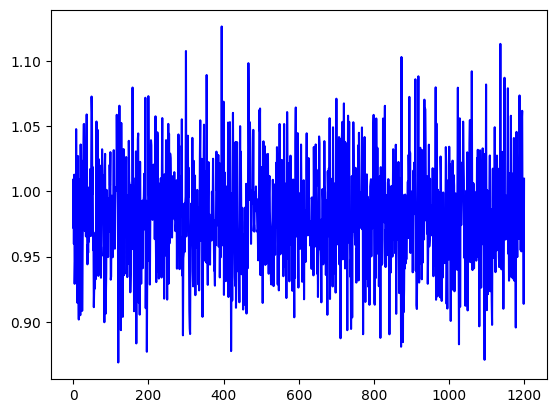

Epoch 10: loss is 1.00967


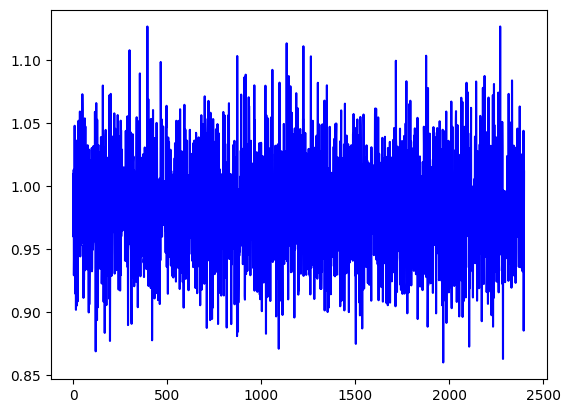

Epoch 20: loss is 1.01149


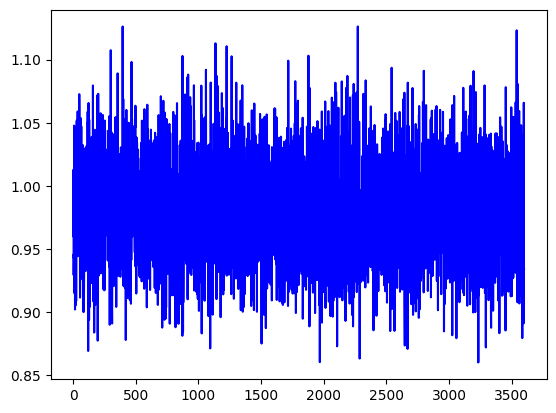

Epoch 30: loss is 0.93410


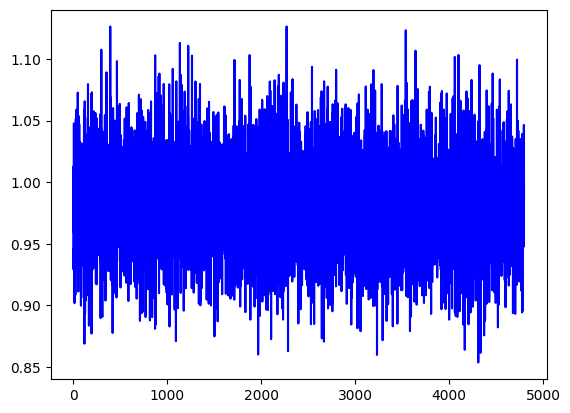

Epoch 40: loss is 0.98636


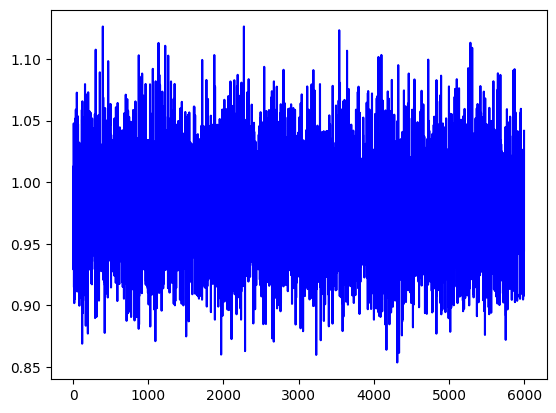

Epoch 50: loss is 1.04163


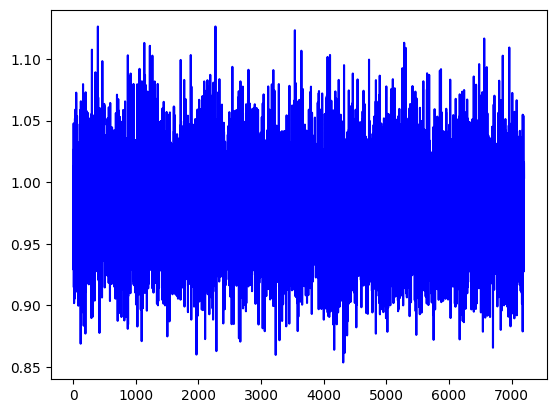

Epoch 60: loss is 1.00363


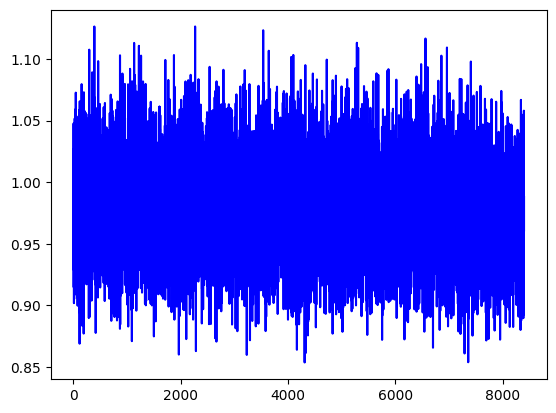

Epoch 70: loss is 0.98788


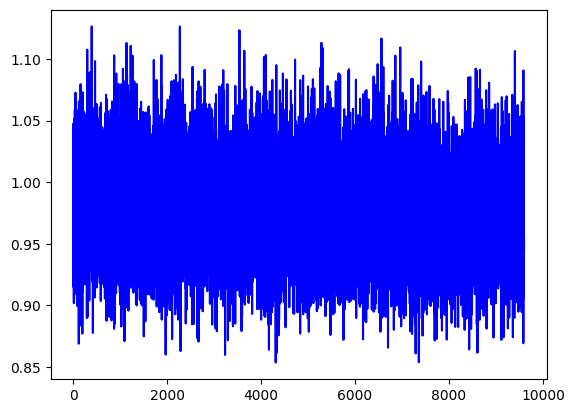

Epoch 80: loss is 0.94427


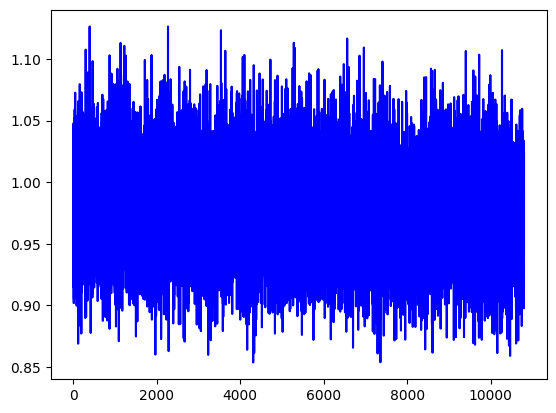

Epoch 90: loss is 1.02362


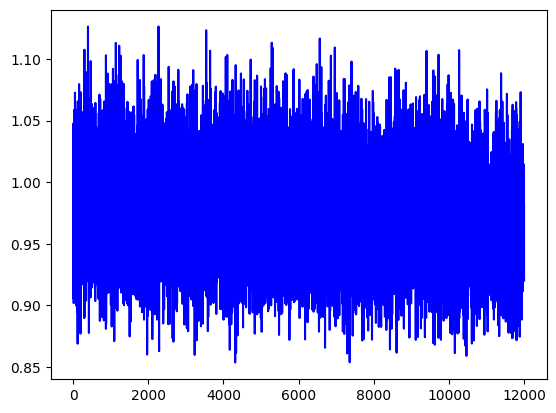

Epoch 100: loss is 0.98220


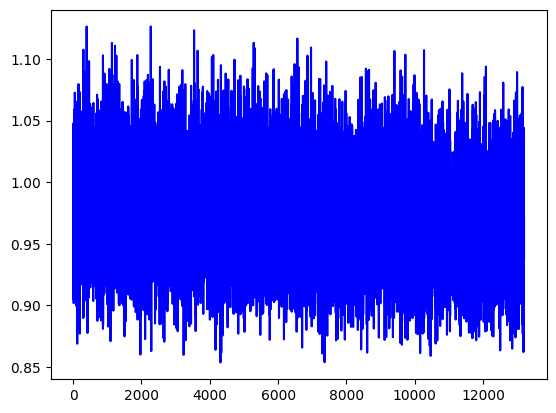

Epoch 110: loss is 0.93843


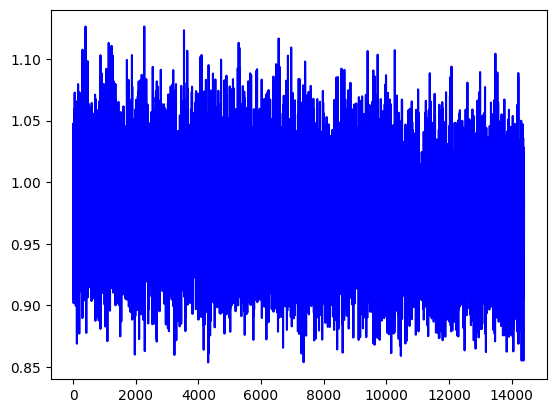

Epoch 120: loss is 0.99003


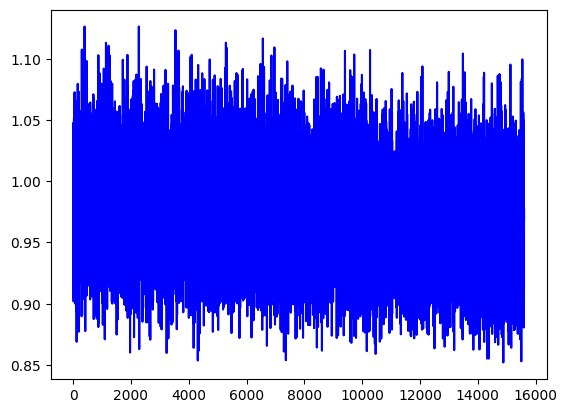

Epoch 130: loss is 0.96900


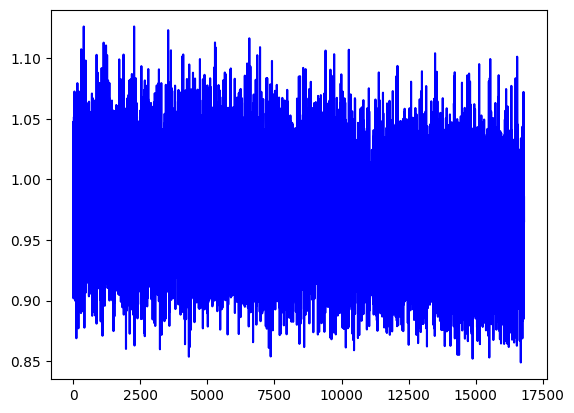

Epoch 140: loss is 0.96555


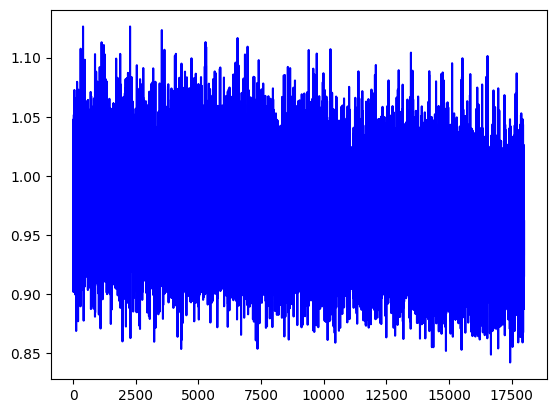

Epoch 150: loss is 0.91578


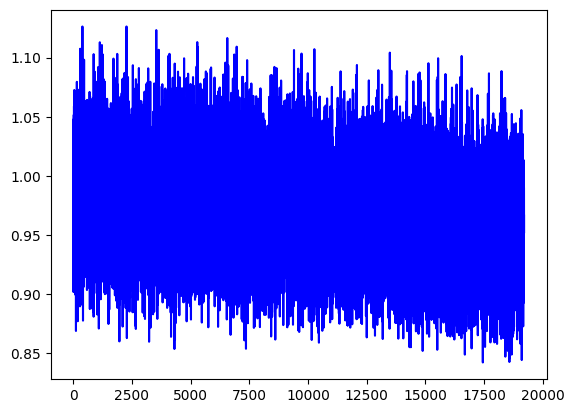

Epoch 160: loss is 0.96632


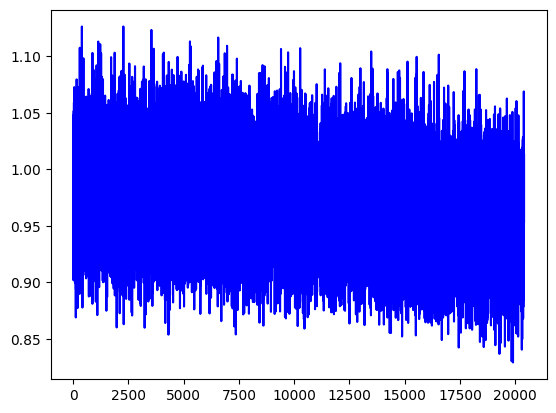

Epoch 170: loss is 0.95359


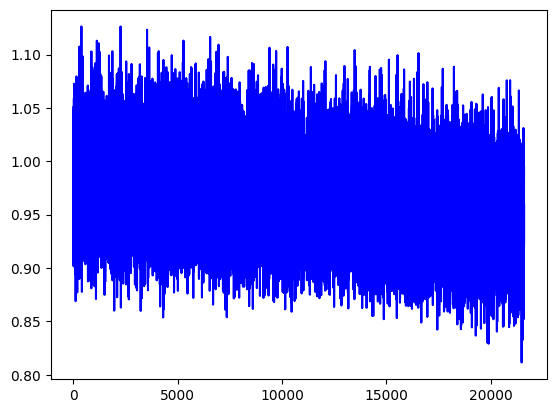

Epoch 180: loss is 0.92353


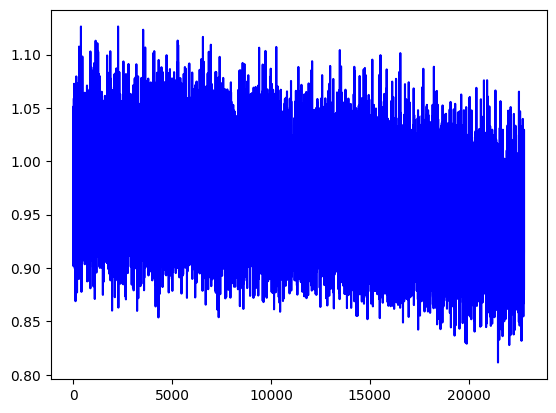

Epoch 190: loss is 0.88043


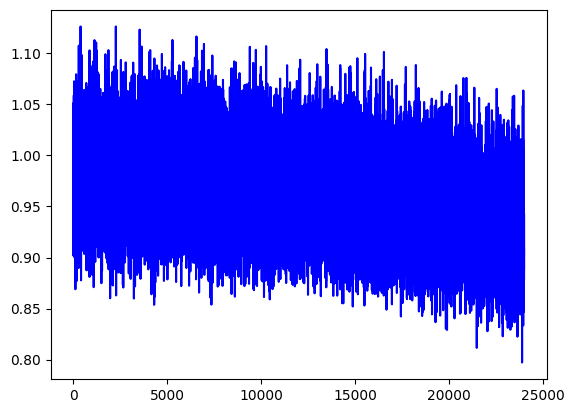

Epoch 200: loss is 0.88940


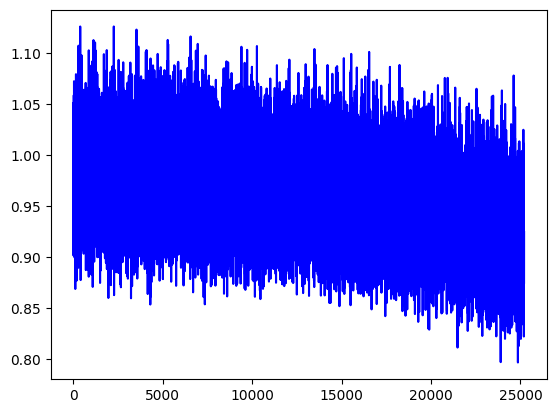

Epoch 210: loss is 0.87511


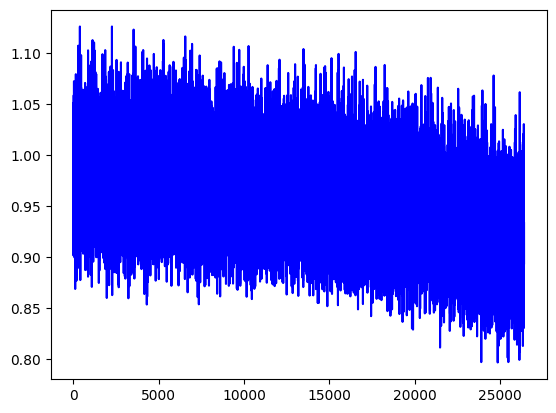

Epoch 220: loss is 0.89417


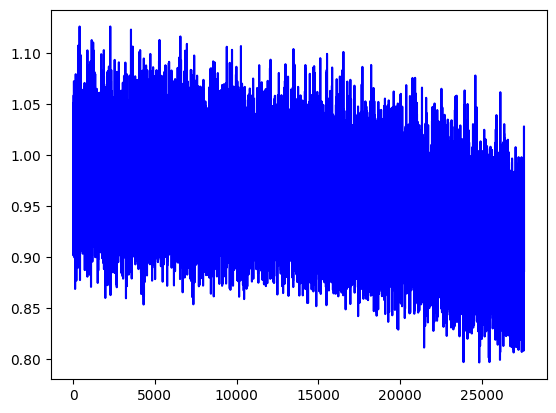

Epoch 230: loss is 0.88670


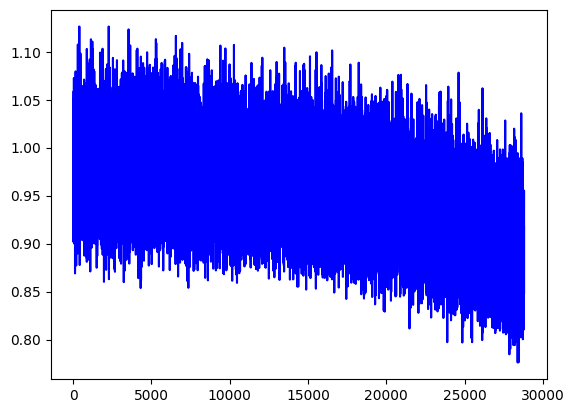

Epoch 240: loss is 0.91732


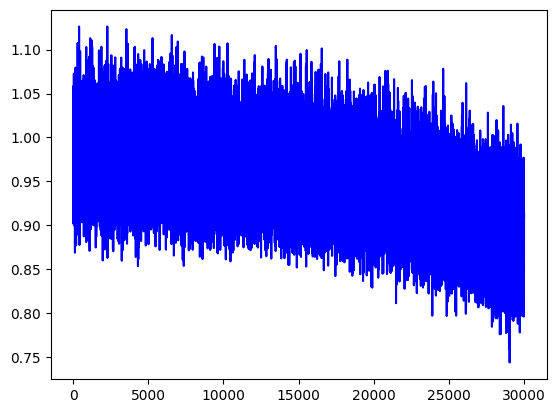

Epoch 250: loss is 0.90938


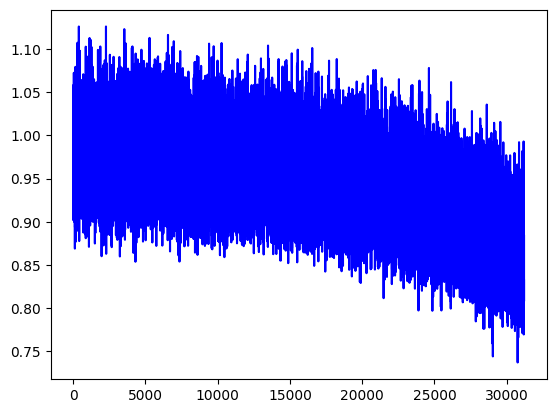

Epoch 260: loss is 0.83200


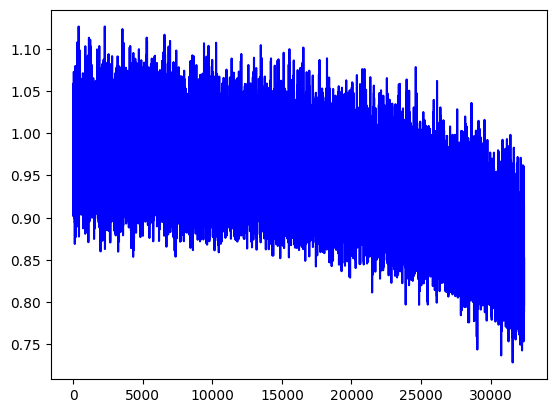

Epoch 270: loss is 0.79713


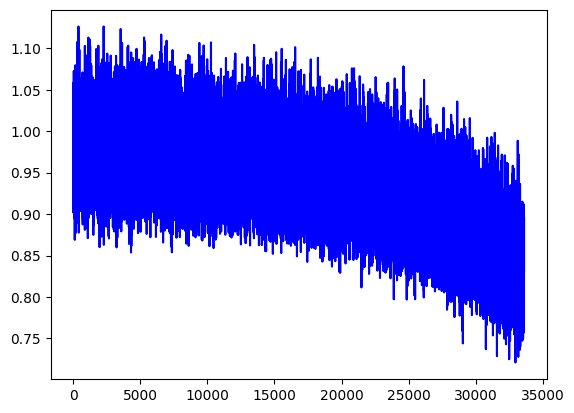

Epoch 280: loss is 0.83098


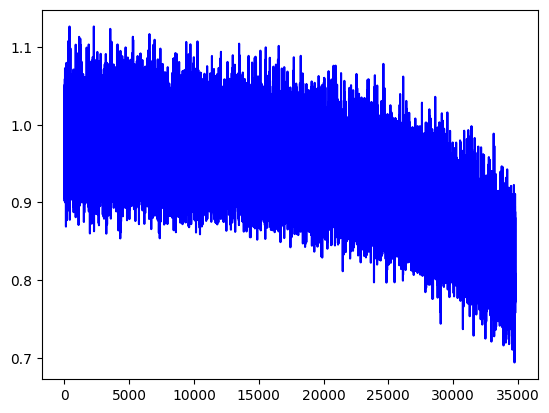

Epoch 290: loss is 0.88688


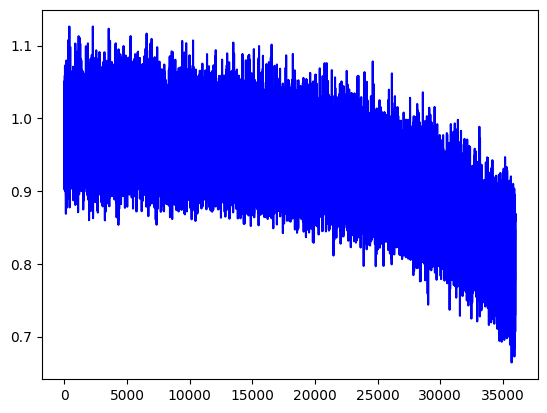

Epoch 300: loss is 0.85901


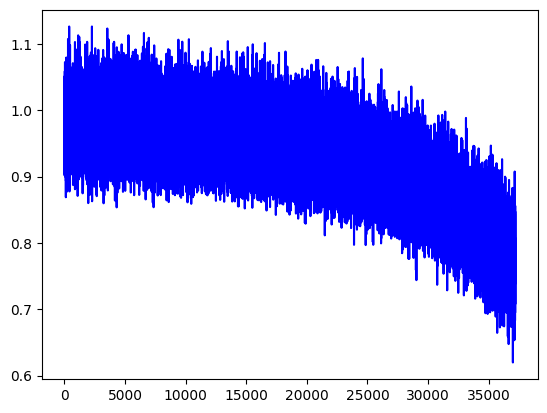

Epoch 310: loss is 0.79013


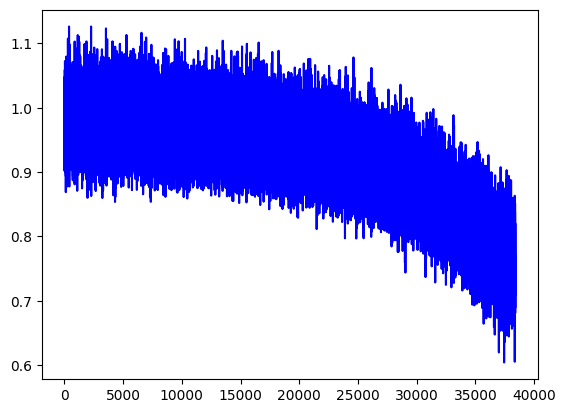

Epoch 320: loss is 0.75336


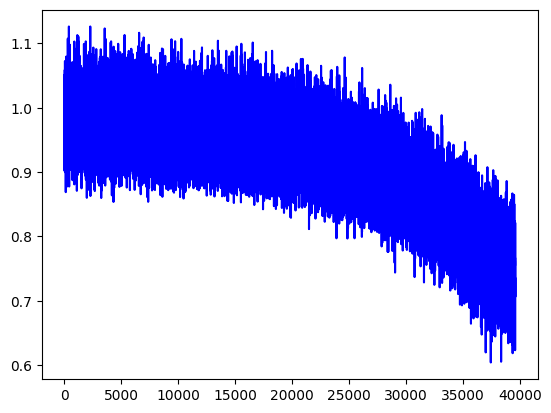

Epoch 330: loss is 0.73470


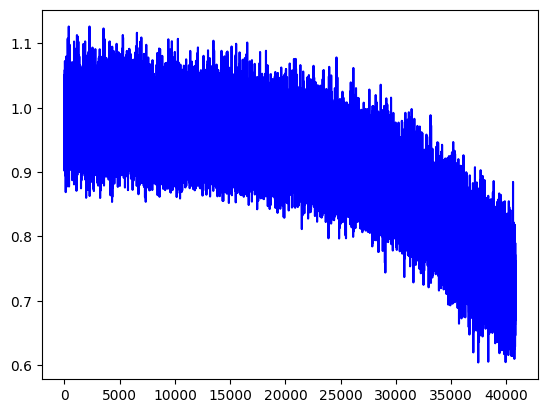

Epoch 340: loss is 0.71313


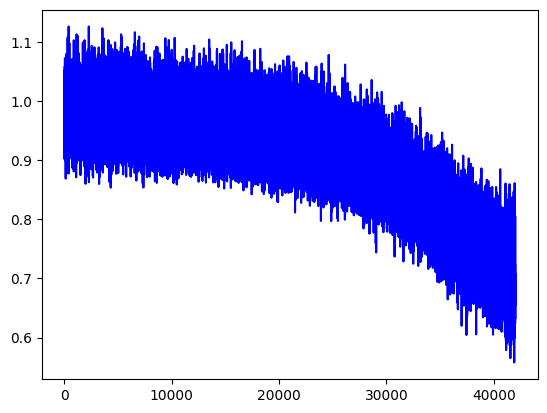

Epoch 350: loss is 0.69713


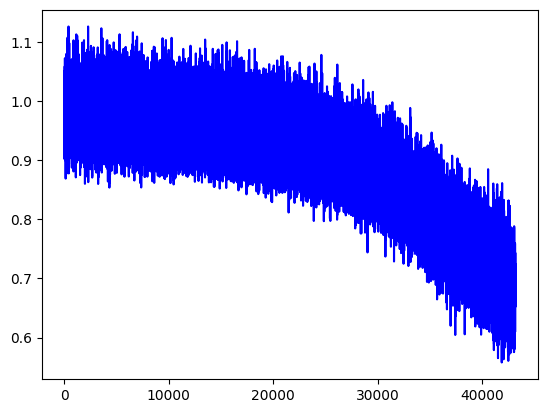

Epoch 360: loss is 0.65257


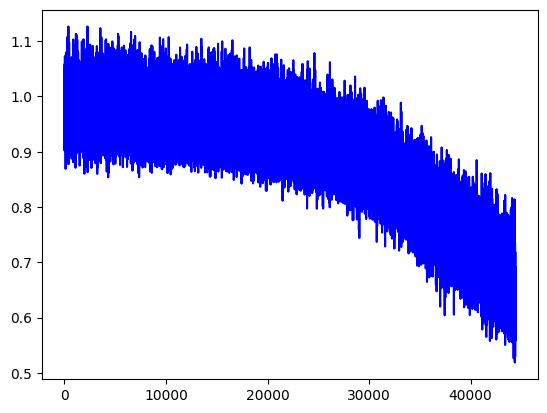

Epoch 370: loss is 0.69148


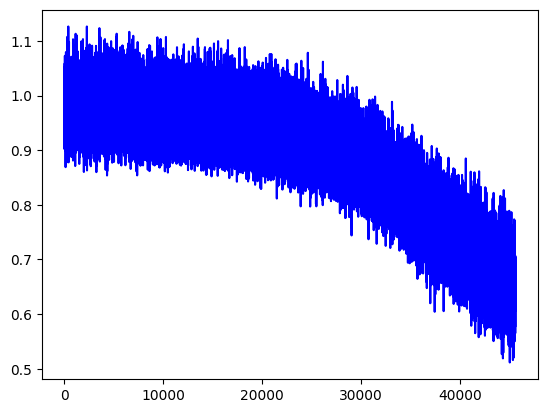

Epoch 380: loss is 0.60720


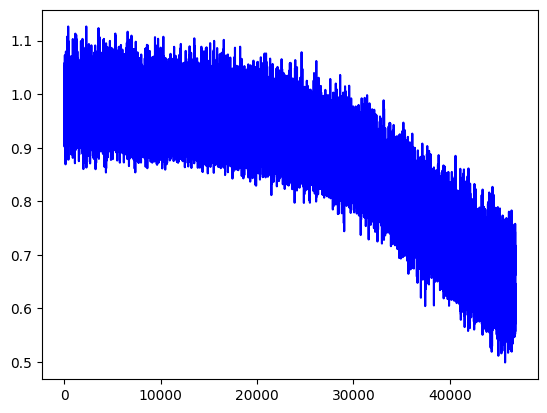

Epoch 390: loss is 0.64561


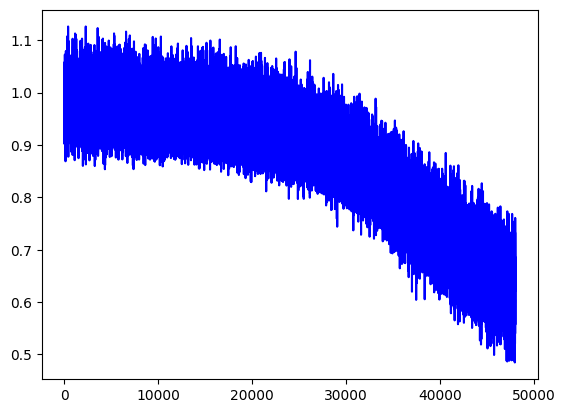

Epoch 400: loss is 0.62262


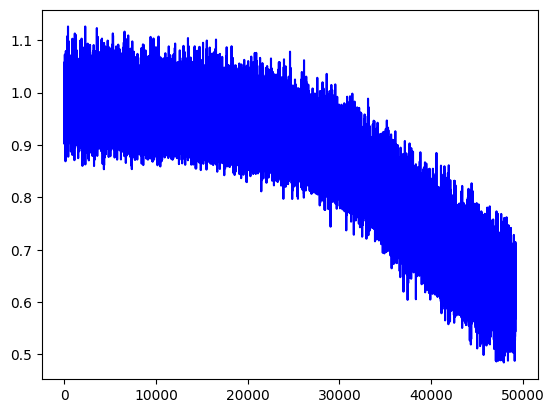

Epoch 410: loss is 0.71393


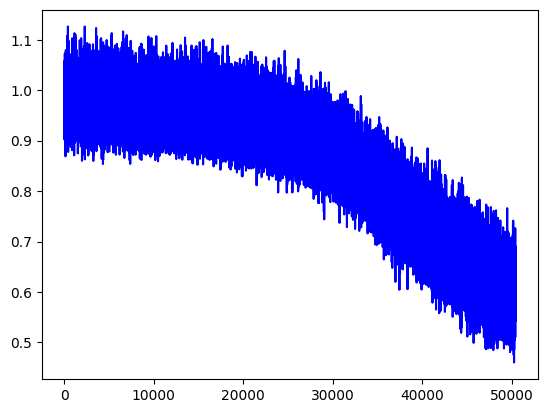

Epoch 420: loss is 0.62703


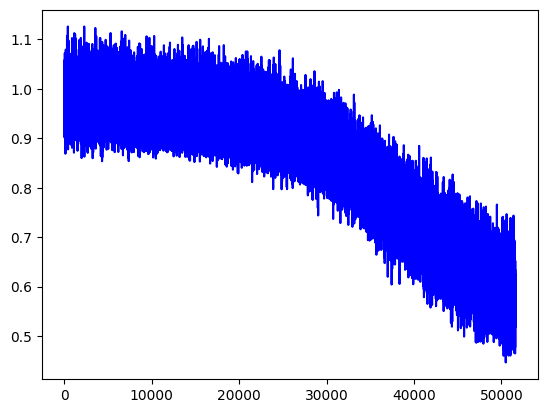

Epoch 430: loss is 0.51848


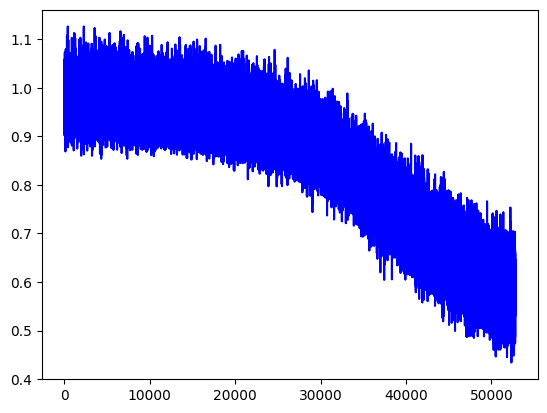

Epoch 440: loss is 0.55255


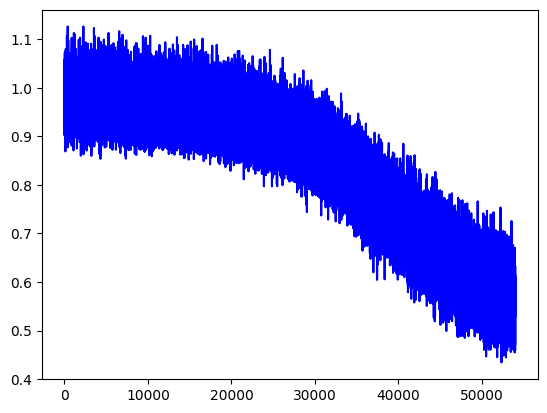

Epoch 450: loss is 0.46088


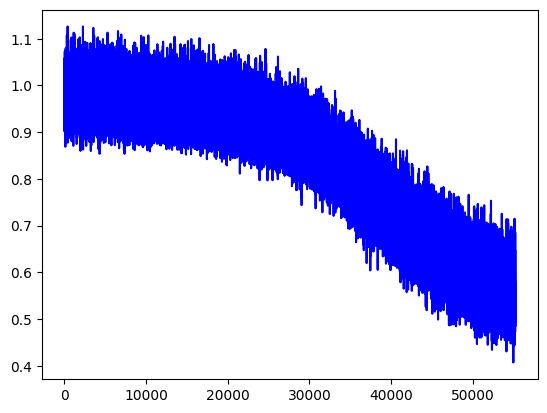

Epoch 460: loss is 0.57032


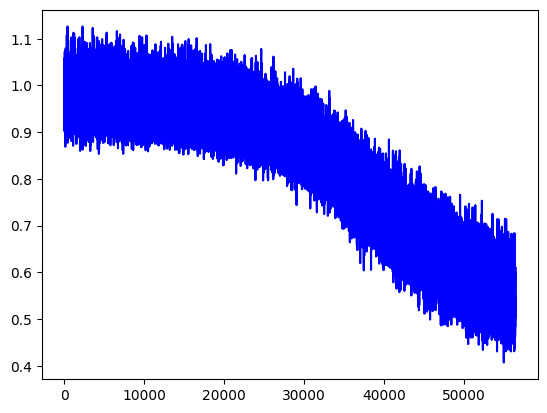

Epoch 470: loss is 0.48516


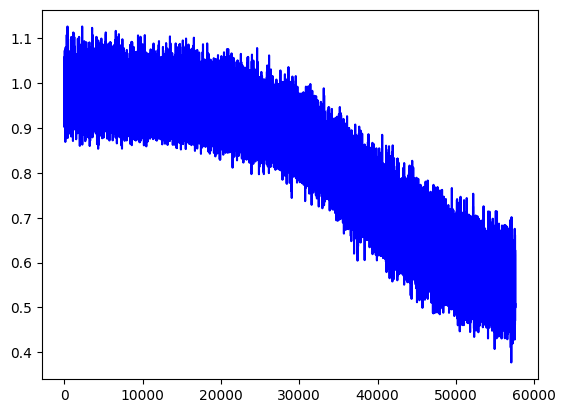

Epoch 480: loss is 0.50720


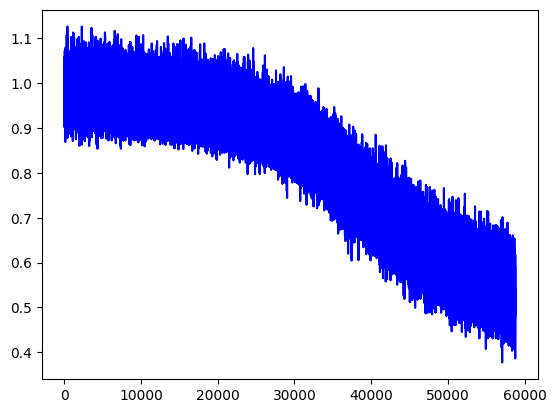

Epoch 490: loss is 0.54262


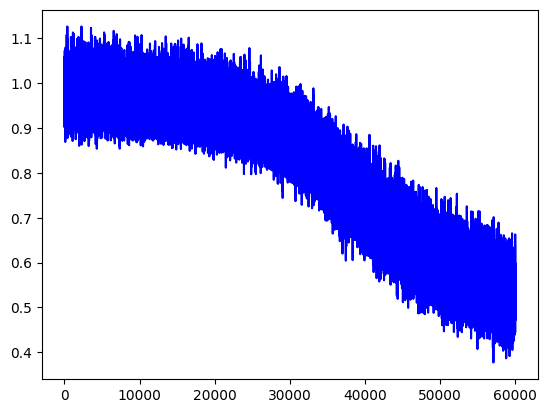

Epoch 500: loss is 0.51837


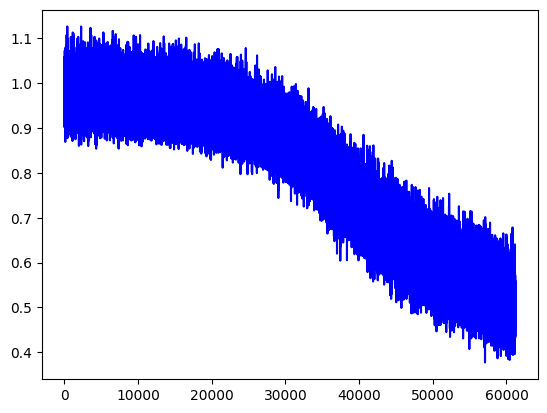

Epoch 510: loss is 0.43827


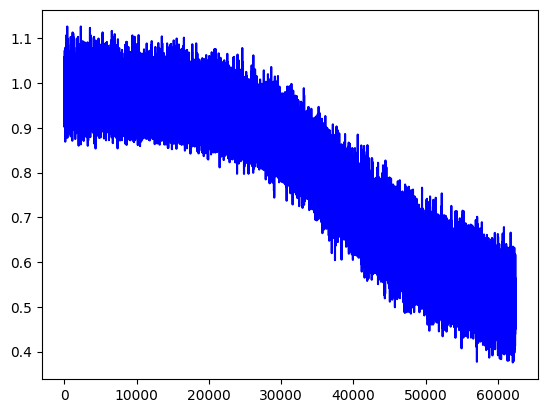

Epoch 520: loss is 0.46938


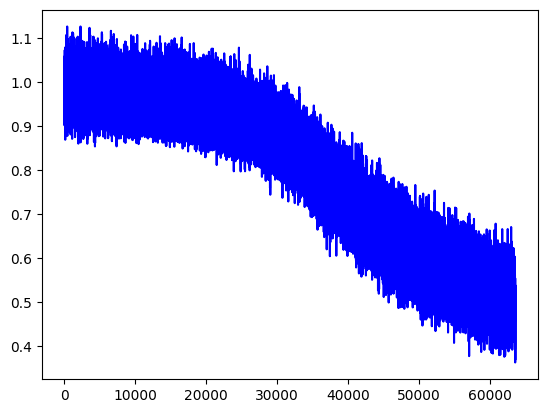

Epoch 530: loss is 0.52361


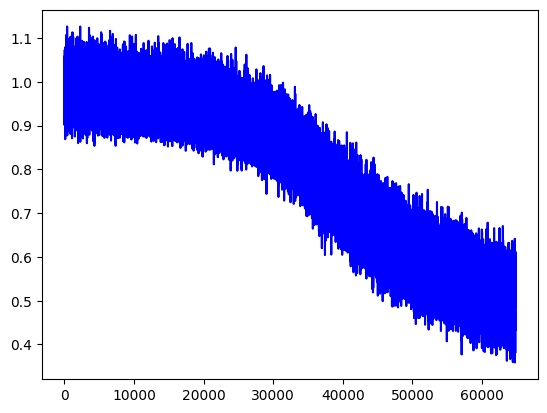

Epoch 540: loss is 0.50122


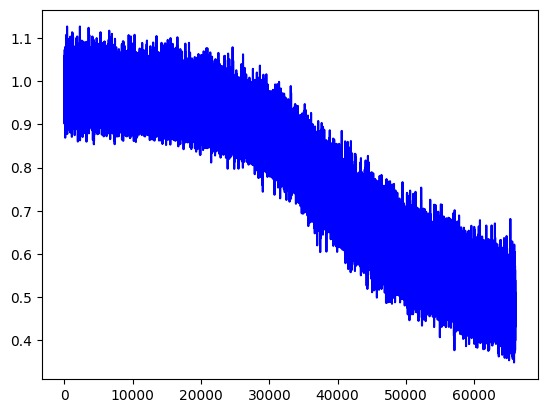

Epoch 550: loss is 0.45141


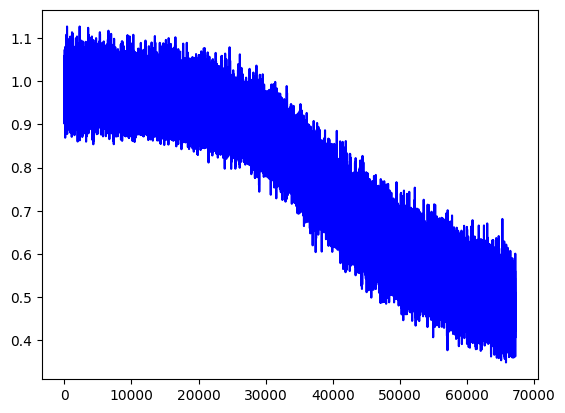

Epoch 560: loss is 0.45854


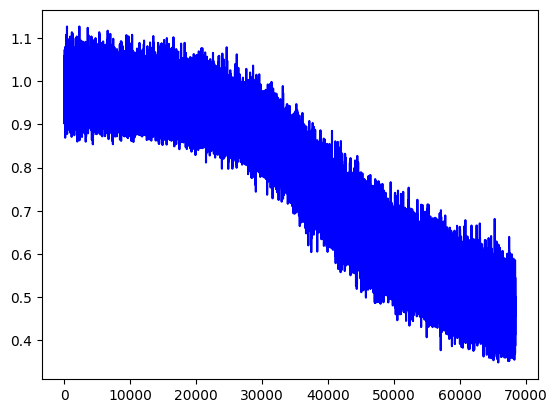

Epoch 570: loss is 0.47236


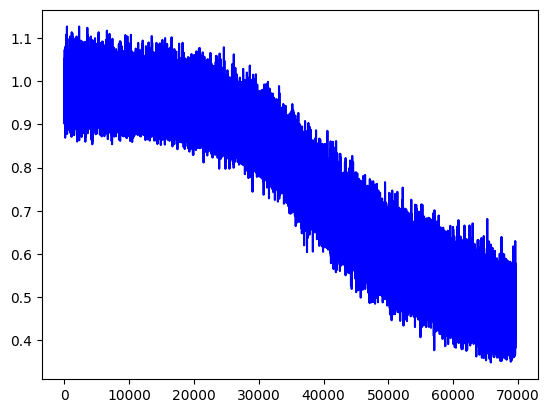

Epoch 580: loss is 0.51754


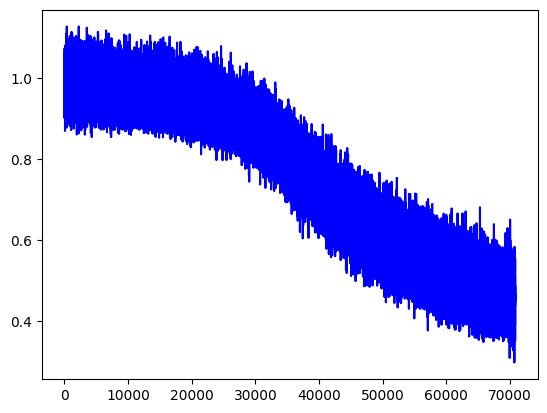

Epoch 590: loss is 0.45172


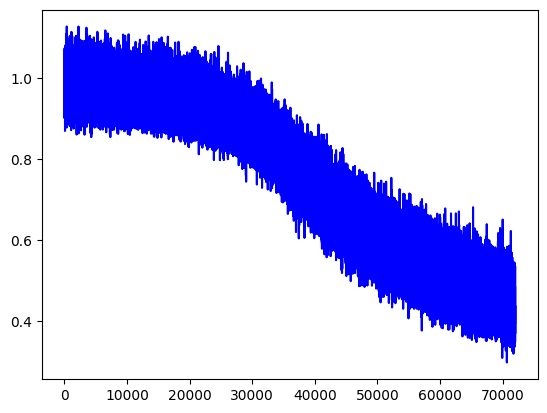

Epoch 600: loss is 0.48318


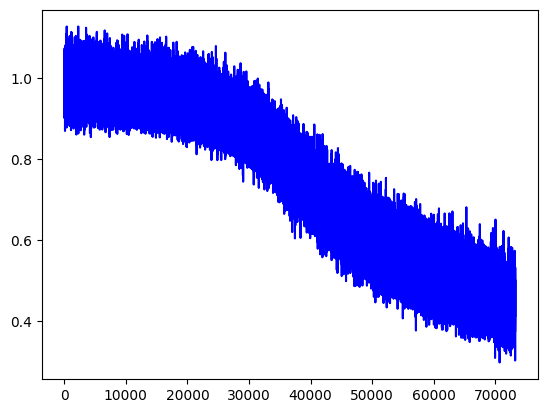

Epoch 610: loss is 0.41348


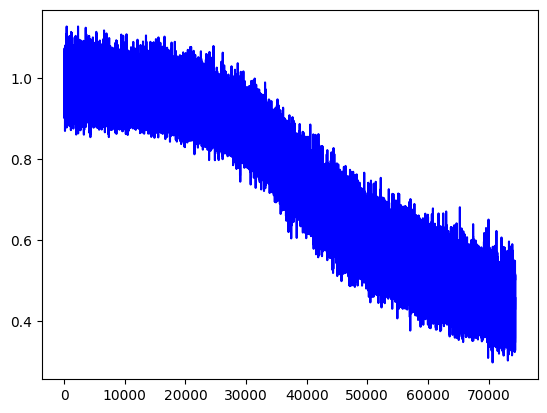

Epoch 620: loss is 0.50384


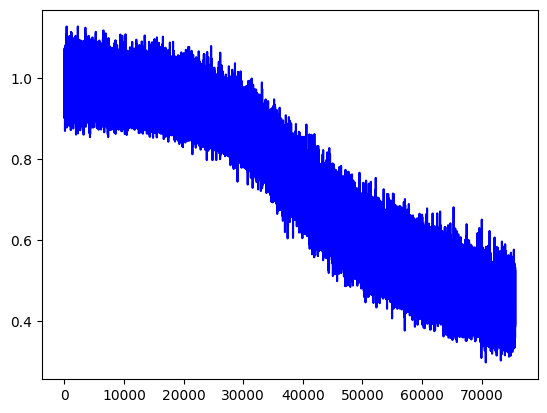

Epoch 630: loss is 0.39435


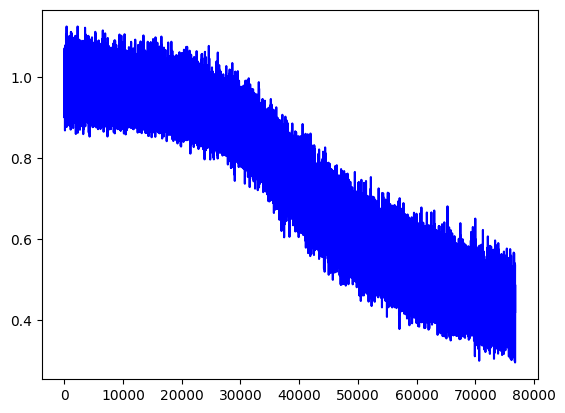

Epoch 640: loss is 0.41947


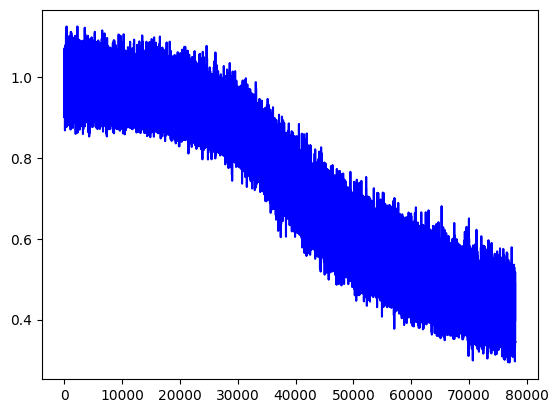

Epoch 650: loss is 0.34496


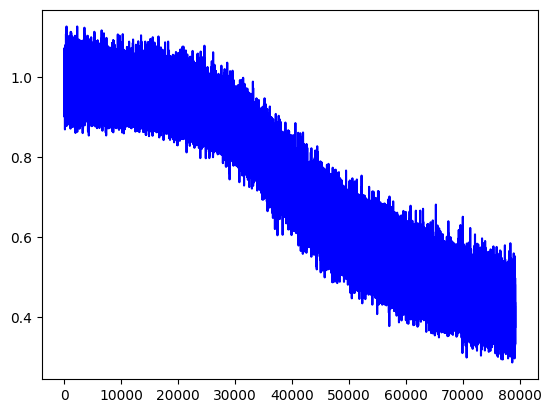

Epoch 660: loss is 0.43439


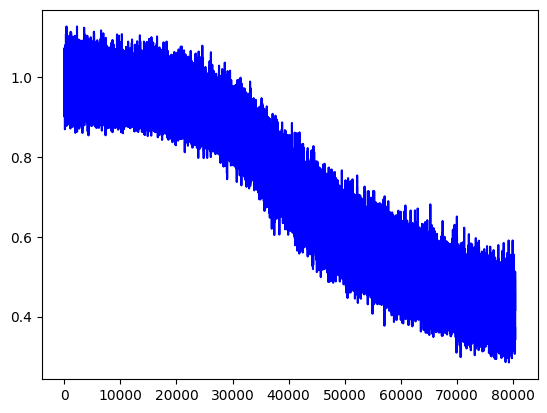

Epoch 670: loss is 0.37160


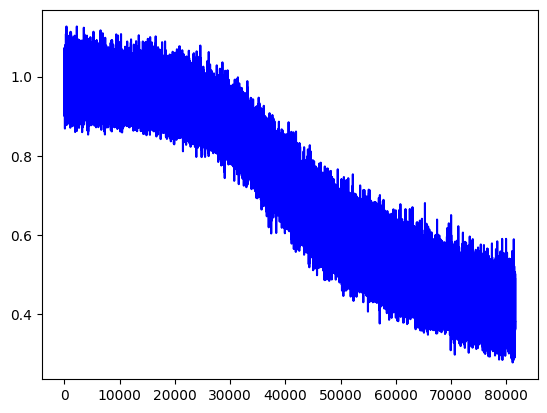

Epoch 680: loss is 0.38124


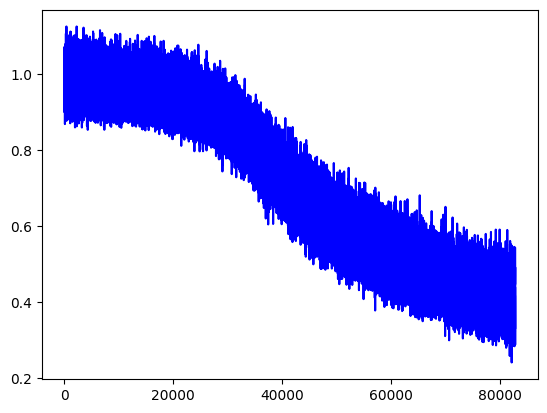

Epoch 690: loss is 0.43609


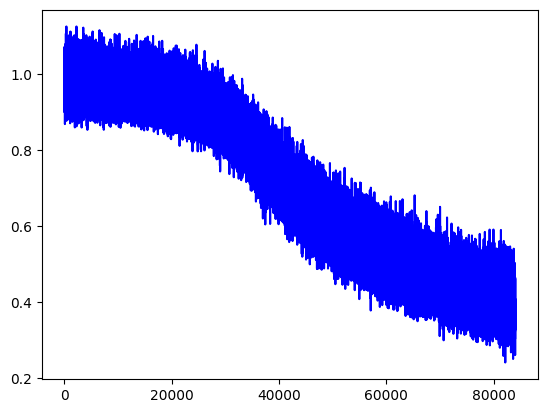

Epoch 700: loss is 0.30453


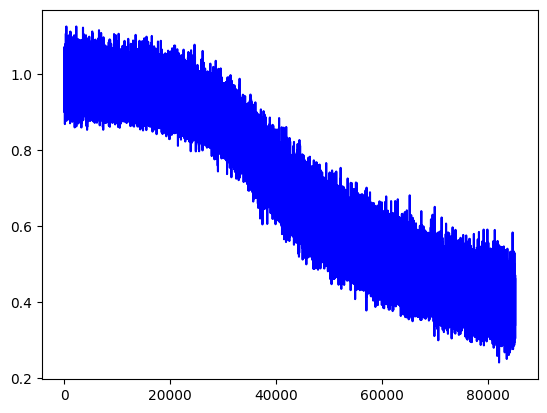

Epoch 710: loss is 0.33952


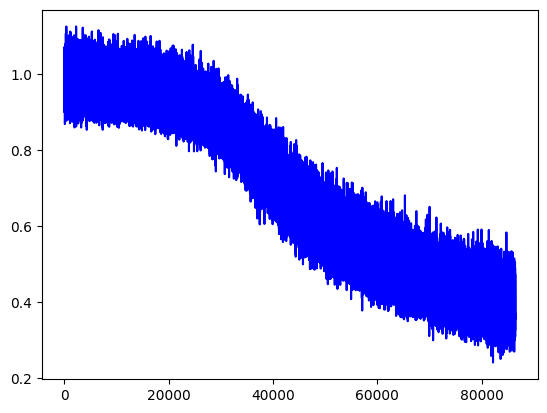

Epoch 720: loss is 0.36761


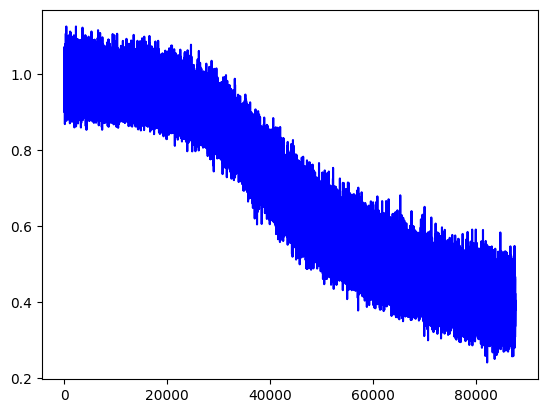

Epoch 730: loss is 0.37923


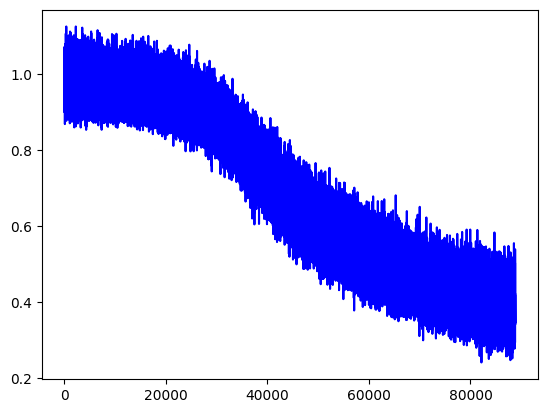

Epoch 740: loss is 0.42016


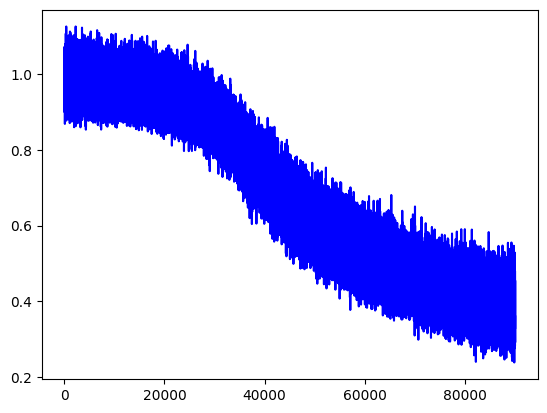

Epoch 750: loss is 0.36007


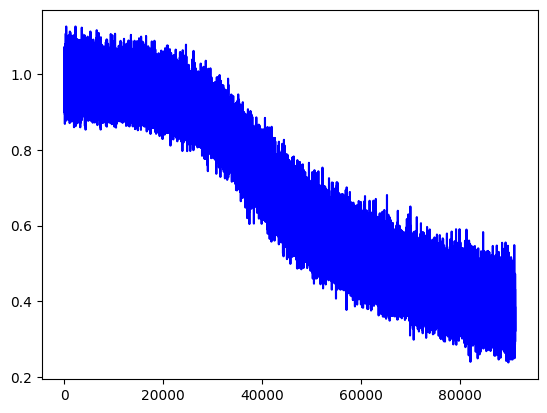

Epoch 760: loss is 0.42954


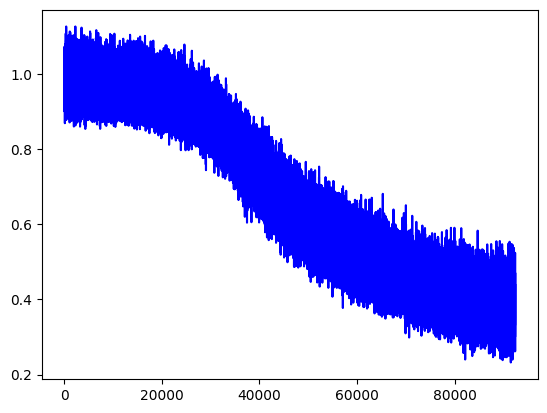

Epoch 770: loss is 0.43828


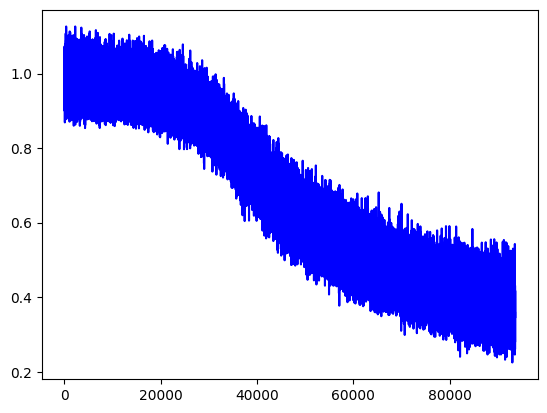

Epoch 780: loss is 0.28216


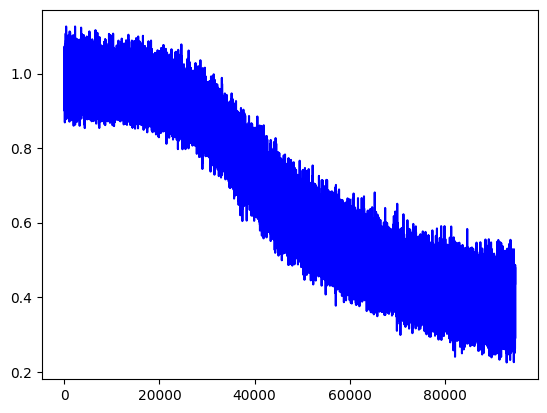

Epoch 790: loss is 0.43639


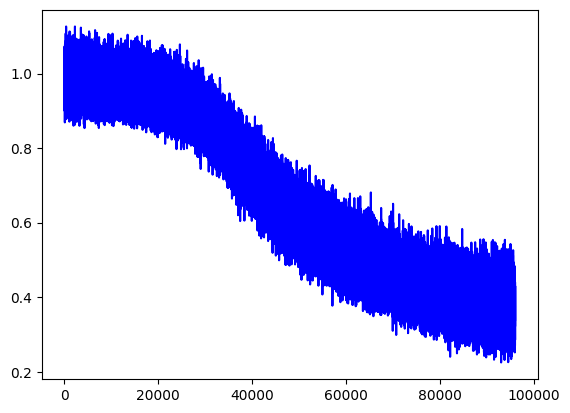

Epoch 800: loss is 0.32430


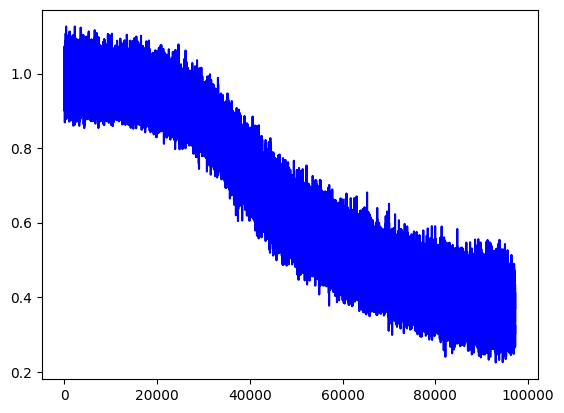

Epoch 810: loss is 0.37064


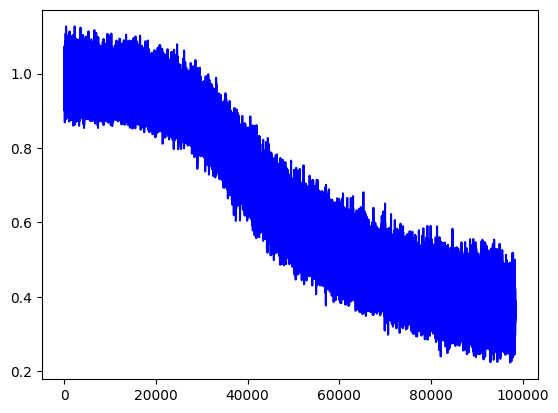

Epoch 820: loss is 0.36978


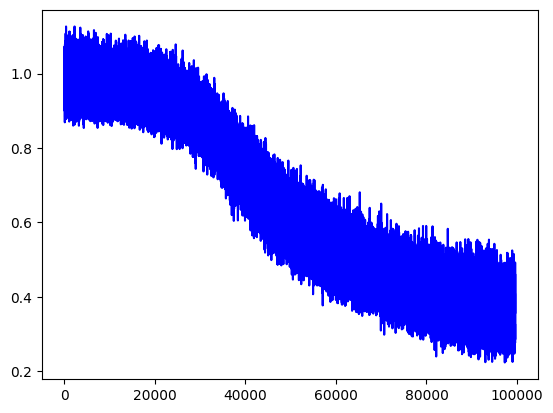

Epoch 830: loss is 0.32461


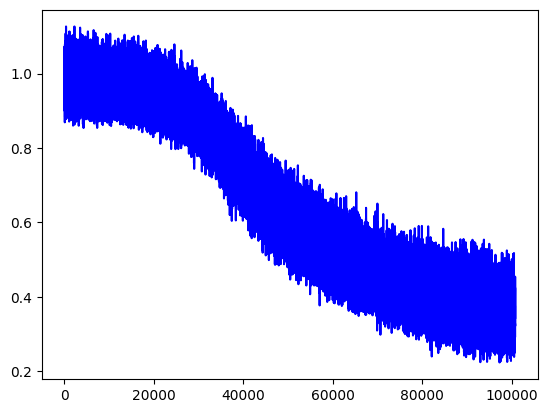

Epoch 840: loss is 0.32574


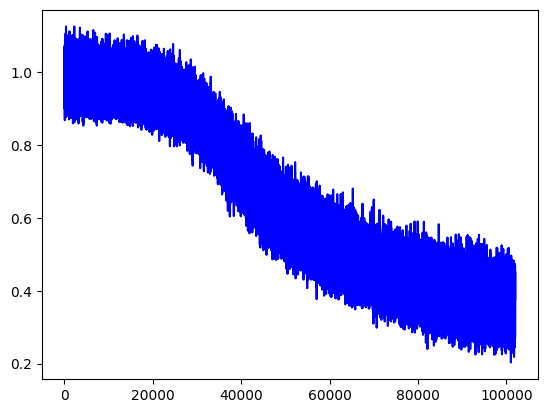

Epoch 850: loss is 0.37772


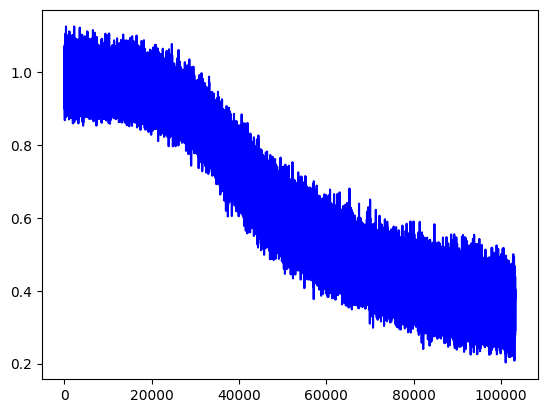

Epoch 860: loss is 0.37623


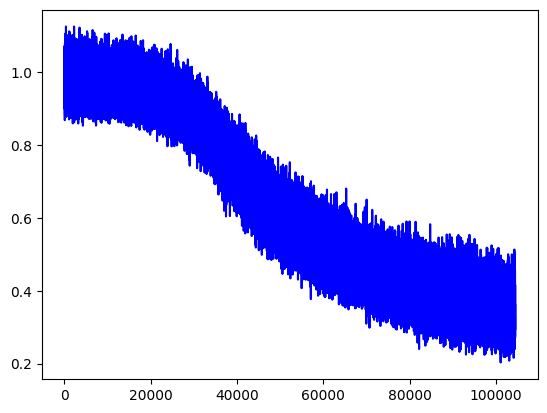

Epoch 870: loss is 0.36047


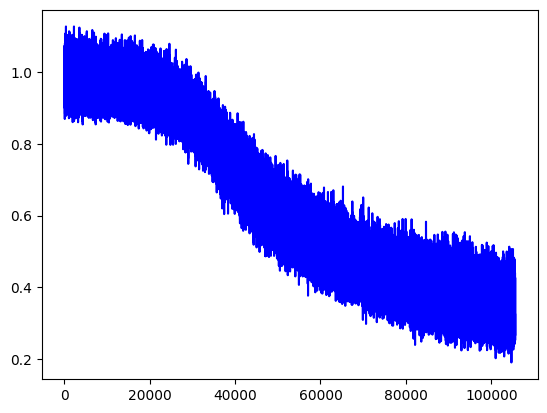

Epoch 880: loss is 0.32432


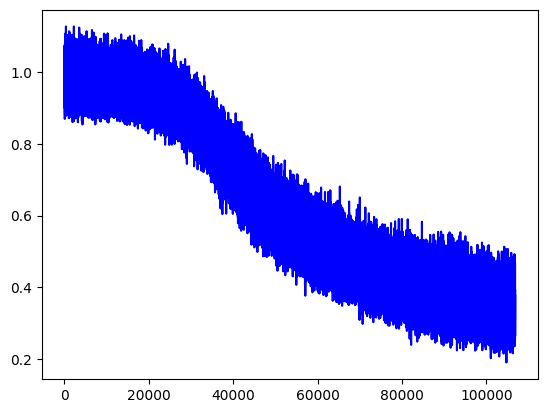

Epoch 890: loss is 0.39143


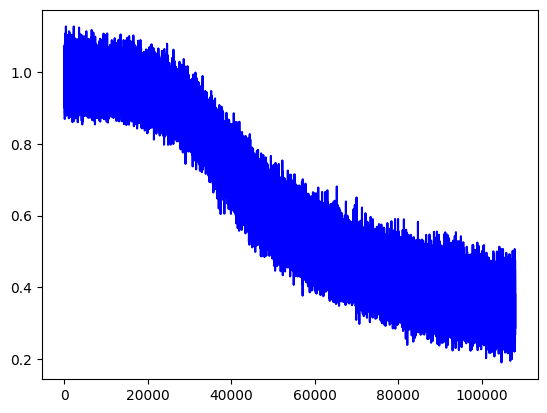

Epoch 900: loss is 0.37989


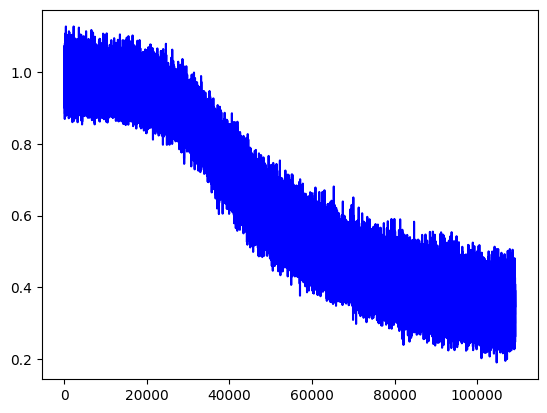

Epoch 910: loss is 0.34769


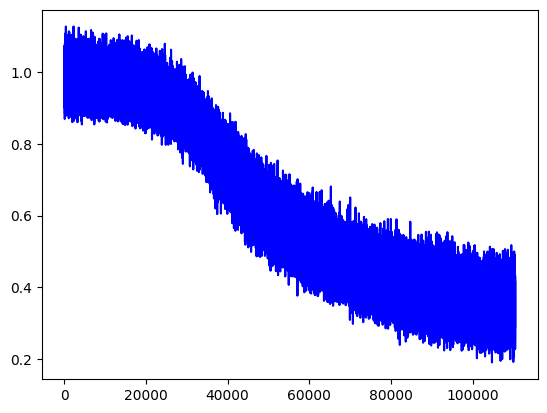

Epoch 920: loss is 0.41595


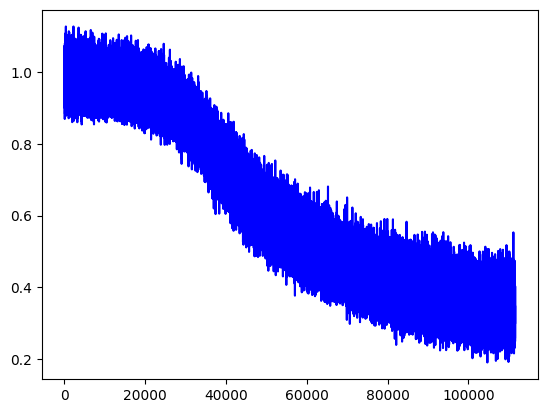

Epoch 930: loss is 0.30181


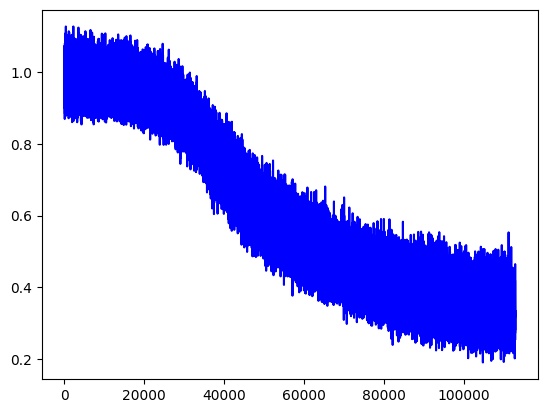

Epoch 940: loss is 0.28378


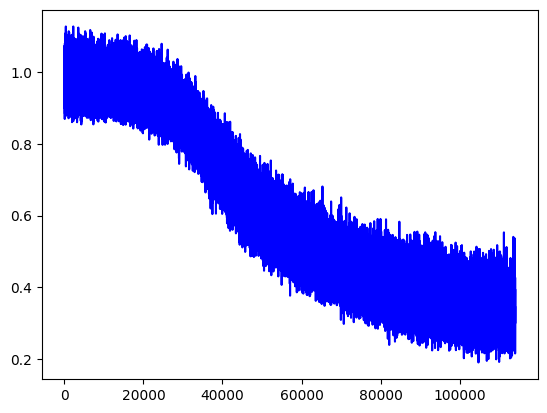

Epoch 950: loss is 0.34486


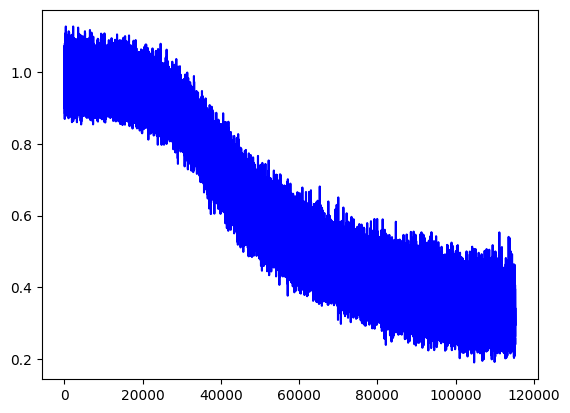

Epoch 960: loss is 0.25664


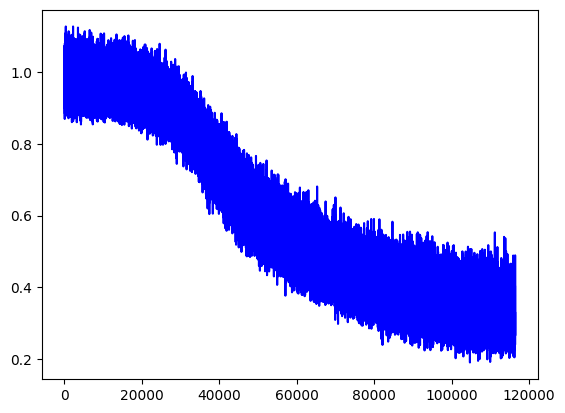

Epoch 970: loss is 0.26944


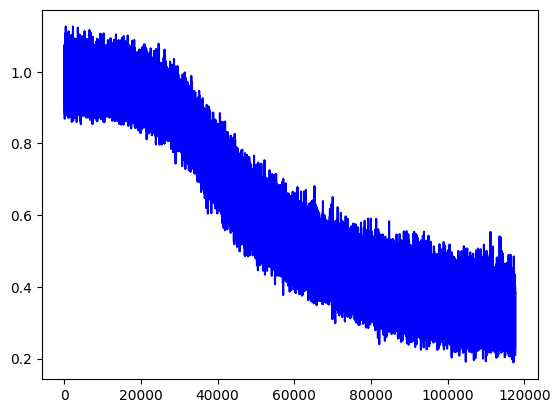

Epoch 980: loss is 0.38385


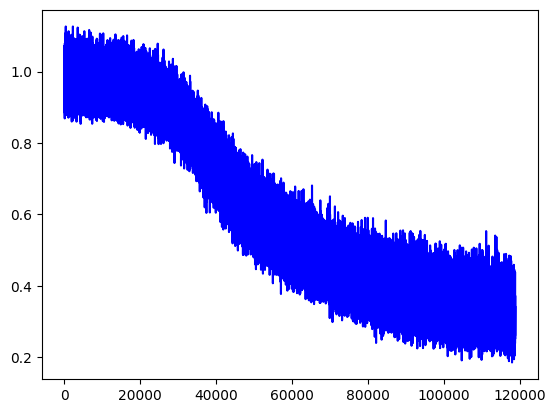

Epoch 990: loss is 0.26325


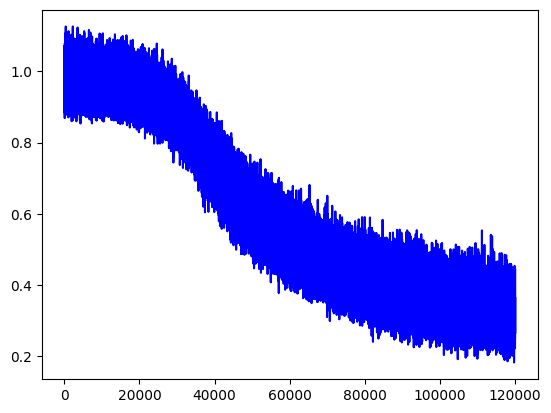

Epoch 1000: loss is 0.44311


In [10]:
# mini batch
train_set_x = train_x[:cfg.num_train].copy()
train_set_y = train_y[:cfg.num_train].copy()
num_batches = int(cfg.num_train/cfg.batch_size)

all_loss = []

for e in range(cfg.num_epoch):
    train_set_x, train_set_y = shuffle(train_set_x, train_set_y)
    for i in range(num_batches):
        batch_x = train_set_x[i*(cfg.batch_size):min((i + 1)*cfg.batch_size, cfg.num_train)]
        batch_y = train_set_y[i*(cfg.batch_size):min((i + 1)*cfg.batch_size, cfg.num_train)]

        all_x = net_2.forward(batch_x)
        y_hat = all_x[-1]
        loss = net_2.compute_loss(batch_y, y_hat)
        grads = net_2.backward(batch_y, all_x)
        net_2.update_weight(grads, cfg.learning_rate)
        all_loss.append(loss)

    if (e % cfg.epochs_to_draw == cfg.epochs_to_draw-1):
        plot_loss(all_loss, 2)
        plt.show()
        plt.pause(0.01)
        print("Epoch %d: loss is %.5f" % (e+1, loss))



In [17]:
# test_y = create_one_hot(test_y, num_class)
# print(y_predict.shape)
# print(ylabel.shape)
# print(y_hat.shape)
# print(test_y.shape)
y_hat = net_2.forward(test_x)[-1]
y_predict = np.argmax(y_hat, axis = 1, keepdims = True)
ylabel = np.argmax(test_y, axis = 1, keepdims = True)
acc = np.mean(y_predict == ylabel)
print("Accuracy : {}%" .format(acc*100))

Accuracy : 86.6%


## Training sử dụng mini-batch với bộ dữ liệu mnist

In [18]:
train_x, train_y, val_x, val_y, test_x, test_y = get_mnist_data(1)
train_x, val_x, test_x = normalize(train_x, train_x, test_x)
test_y = test_y.flatten()
train_y = train_y.flatten()
num_class = (np.unique(train_y)).shape[0]
train_x = add_one(train_x)
val_x = add_one(val_x)
test_x = add_one(test_x)

cfg = Config(num_epoch=300, learning_rate=0.001, batch_size=200, num_train=train_x.shape[0], visualize=False)

Reading fashion MNIST data...
Done reading


In [19]:
num_hidden_nodes = 100
num_hidden_nodes_2 = 100
num_hidden_nodes_3 = 100
net_3 = NeuralNet(num_class, reg = 1e-5)
net_3.add_linear_layer((train_x.shape[1], num_hidden_nodes), activation = 'relu')
net_3.add_linear_layer((num_hidden_nodes, num_hidden_nodes_2), activation = 'relu')
net_3.add_linear_layer((num_hidden_nodes_2, num_hidden_nodes_3), activation = 'relu')
net_3.add_linear_layer((num_hidden_nodes_3, num_class), activation= 'softmax')
train_y = create_one_hot(train_y, net_3.num_class)


In [20]:
print(train_x.shape)

(50000, 785)


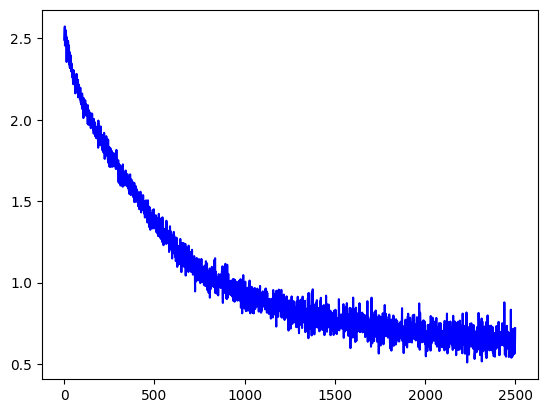

Epoch 10: loss is 0.72015


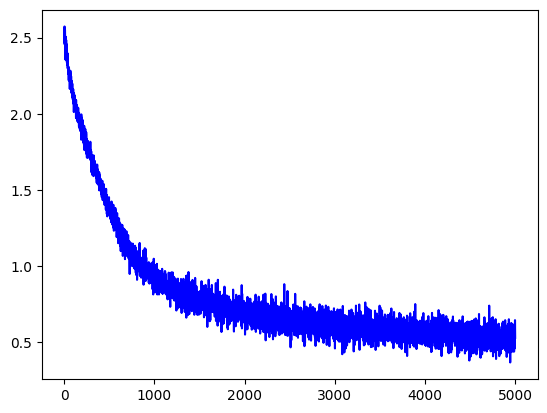

Epoch 20: loss is 0.52577


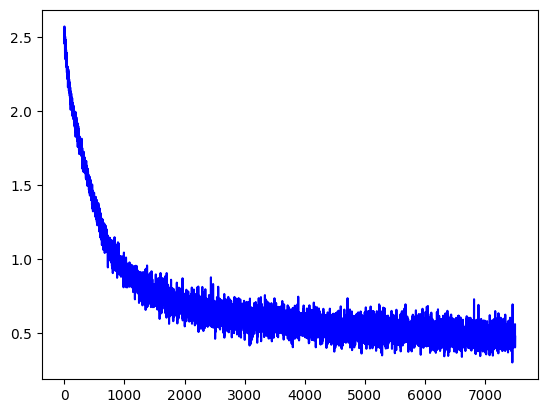

Epoch 30: loss is 0.47796


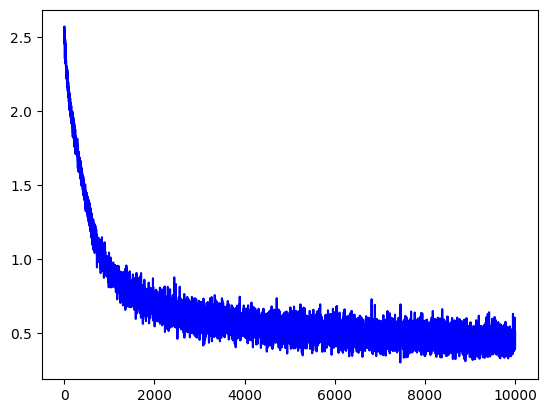

Epoch 40: loss is 0.50596


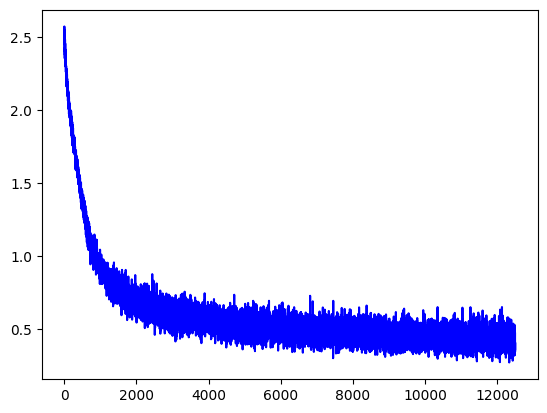

Epoch 50: loss is 0.36464


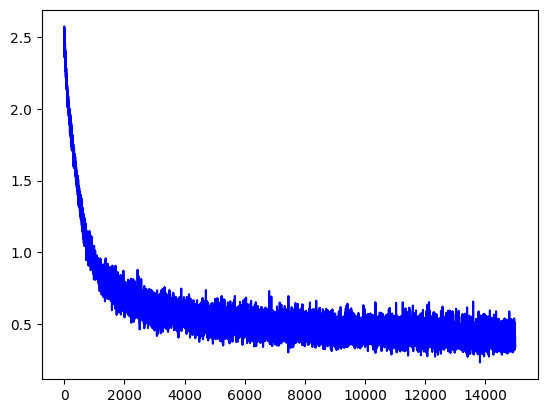

Epoch 60: loss is 0.34733


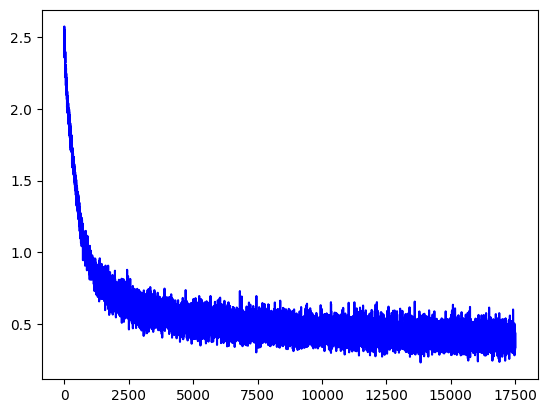

Epoch 70: loss is 0.43881


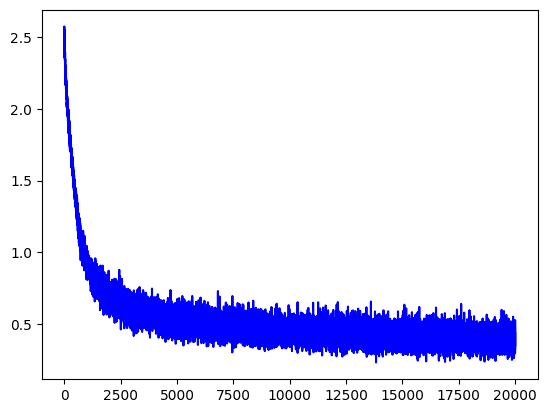

Epoch 80: loss is 0.33277


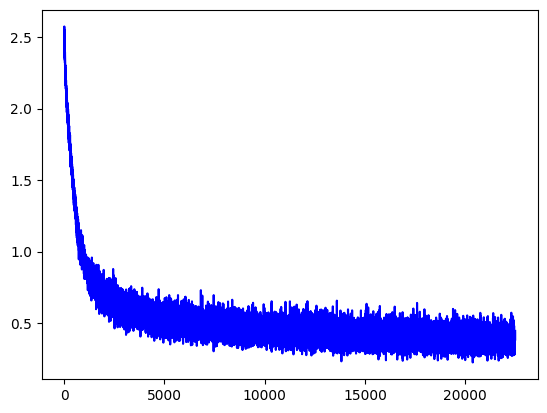

Epoch 90: loss is 0.44591


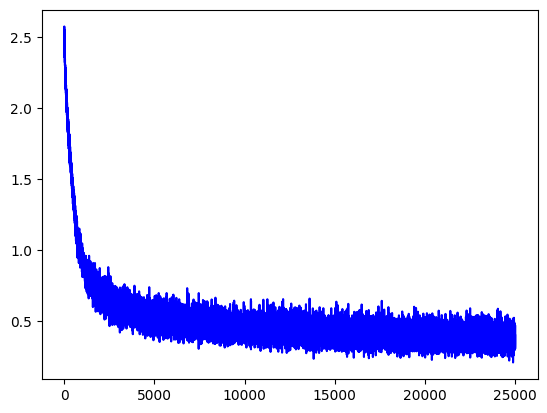

Epoch 100: loss is 0.39825


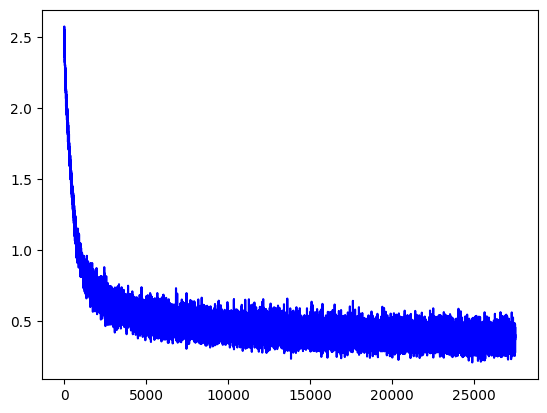

Epoch 110: loss is 0.38550


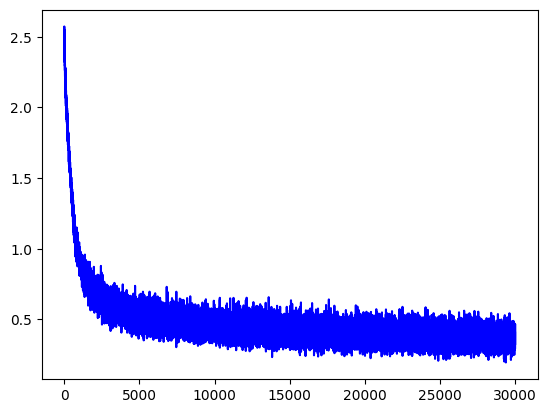

Epoch 120: loss is 0.32672


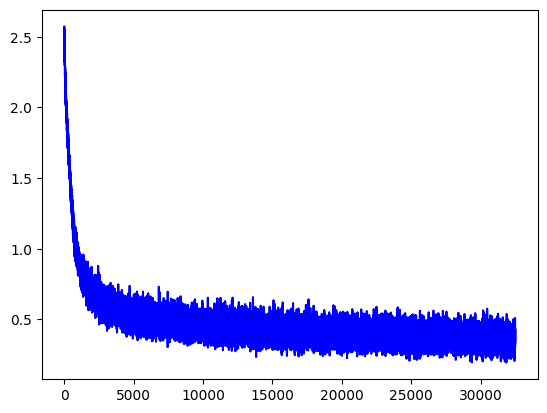

Epoch 130: loss is 0.33872


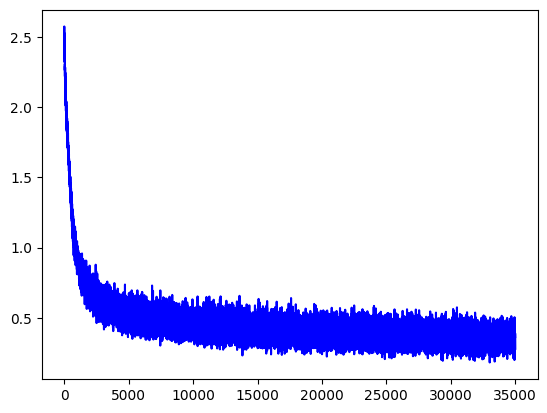

Epoch 140: loss is 0.36391


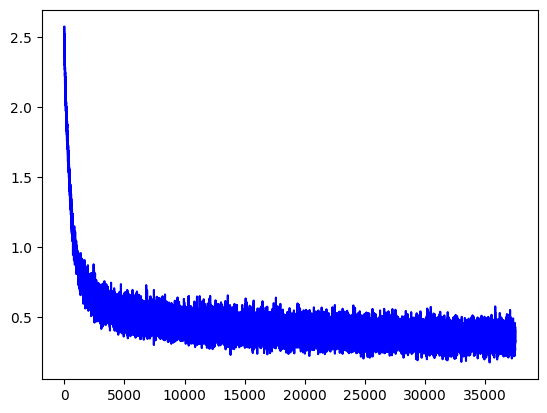

Epoch 150: loss is 0.40622


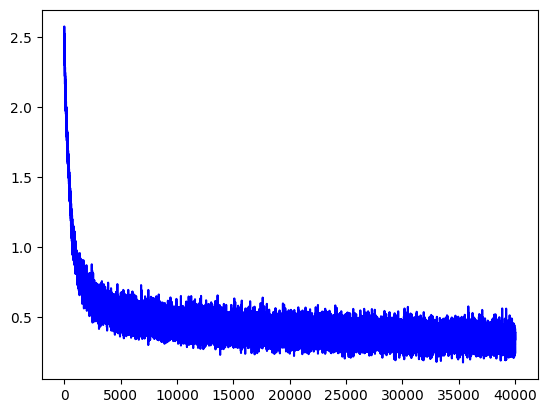

Epoch 160: loss is 0.41380


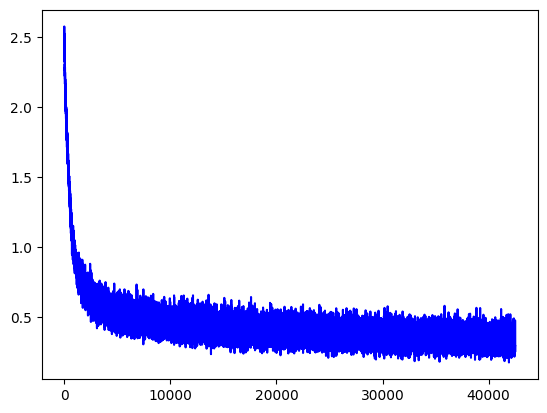

Epoch 170: loss is 0.28974


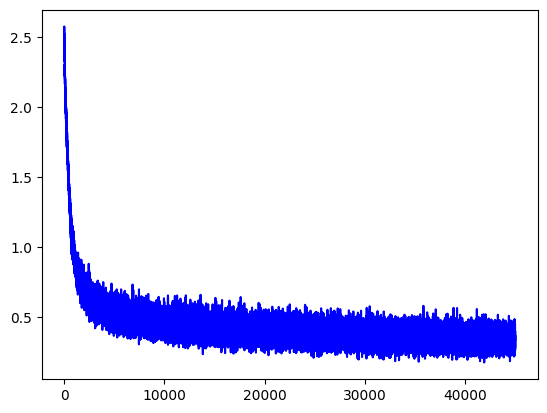

Epoch 180: loss is 0.26195


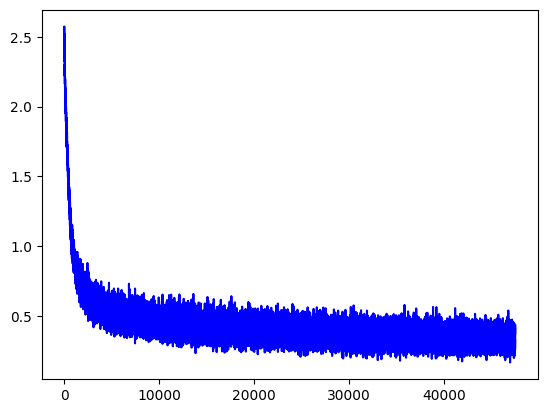

Epoch 190: loss is 0.37336


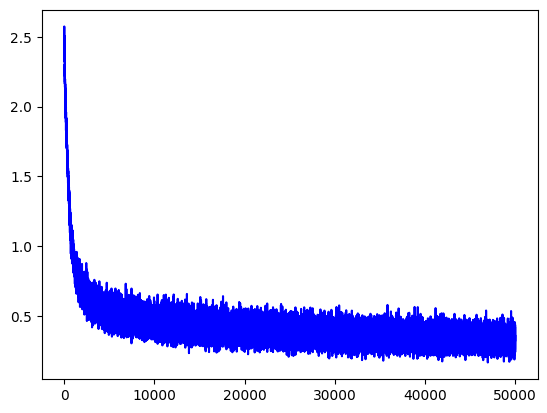

Epoch 200: loss is 0.32535


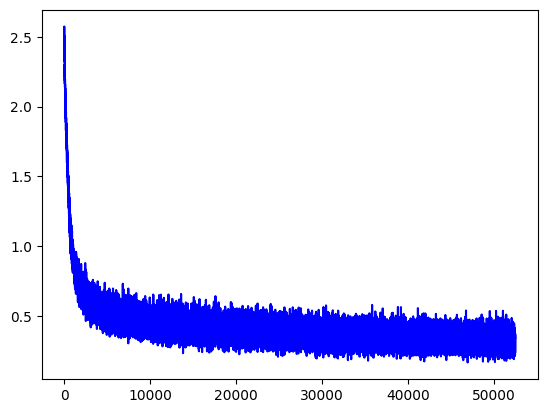

Epoch 210: loss is 0.34335


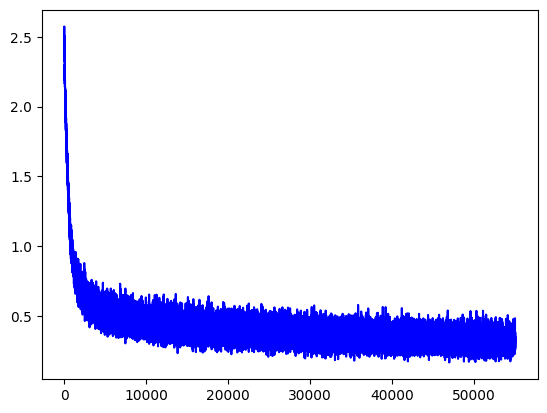

Epoch 220: loss is 0.28110


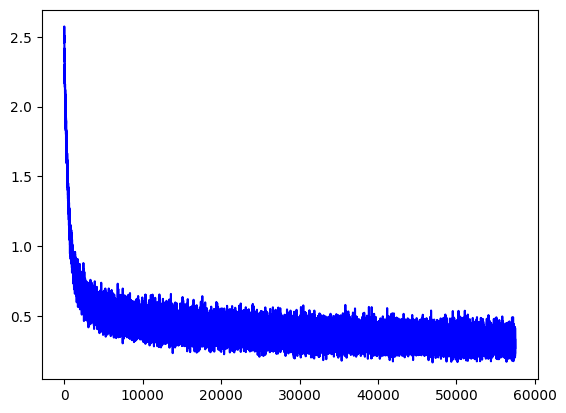

Epoch 230: loss is 0.23710


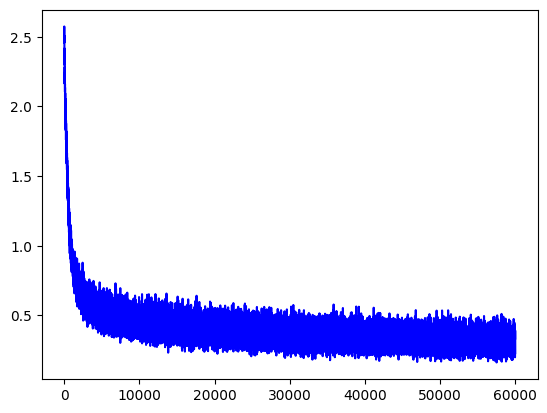

Epoch 240: loss is 0.33462


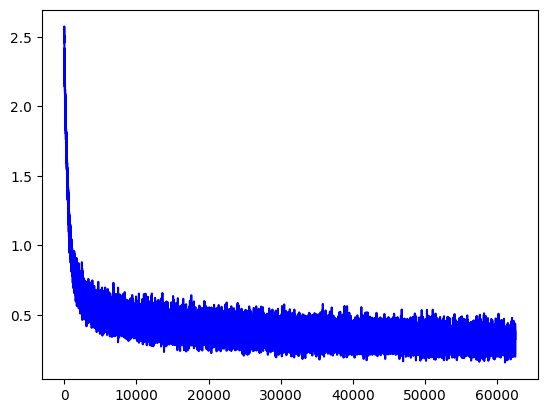

Epoch 250: loss is 0.37403


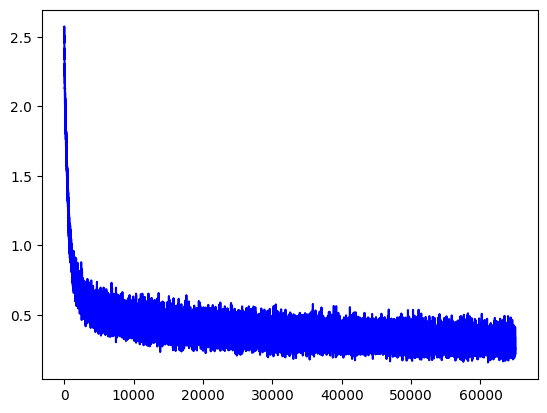

Epoch 260: loss is 0.33520


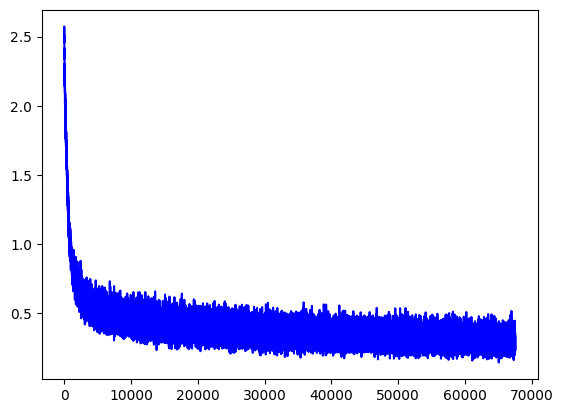

Epoch 270: loss is 0.24211


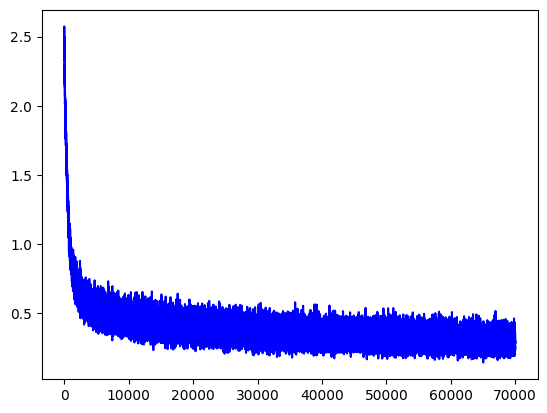

Epoch 280: loss is 0.28313


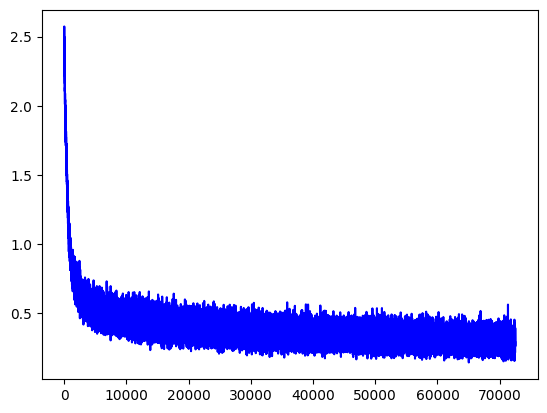

Epoch 290: loss is 0.28987


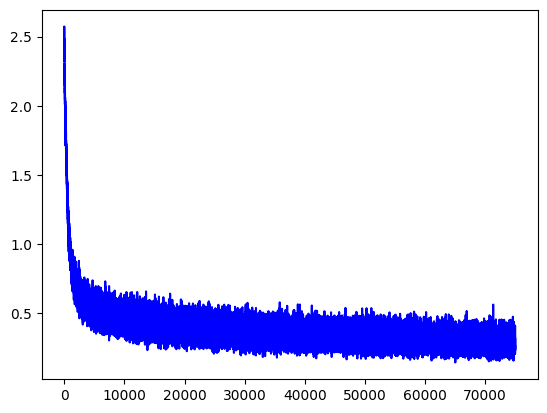

Epoch 300: loss is 0.26366


In [21]:
# mini batch
train_set_x = train_x[:train_x.shape[0]].copy()
train_set_y = train_y[:train_x.shape[0]].copy()
num_batches = int(cfg.num_train/cfg.batch_size)

all_loss = []

for e in range(cfg.num_epoch):
    train_set_x, train_set_y = shuffle(train_set_x, train_set_y)
    for i in range(num_batches):
        batch_x = train_set_x[i*(cfg.batch_size):min((i + 1)*cfg.batch_size, cfg.num_train)]
        batch_y = train_set_y[i*(cfg.batch_size):min((i + 1)*cfg.batch_size, cfg.num_train)]

        all_x = net_3.forward(batch_x)
        y_hat = all_x[-1]
        loss = net_3.compute_loss(batch_y, y_hat)
        grads = net_3.backward(batch_y, all_x)
        net_3.update_weight(grads, cfg.learning_rate)
        all_loss.append(loss)

    if (e % cfg.epochs_to_draw == cfg.epochs_to_draw-1):
        plot_loss(all_loss, 2)
        plt.show()
        plt.pause(0.01)
        print("Epoch %d: loss is %.5f" % (e+1, loss))



* Kiểm tra độ chính xác trên tập test

In [23]:
test_y = create_one_hot(test_y, num_class)
y_hat = net_3.forward(test_x)[-1]
y_predict = np.argmax(y_hat, axis = 1, keepdims = True)
ylabel = np.argmax(test_y, axis = 1, keepdims = True)
acc = np.mean(y_predict == ylabel)
print("Accuracy : {}%" .format(acc*100))

Accuracy : 87.17%
